# Models
From the EDA, I was able to think of my dataset in terms of the officers, the suspects, and the location in which the stops happened. 

In [1]:
# Set Up
import pandas as pd
import numpy as np

# These lines make warnings look nicer
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Graphing
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,10)
import seaborn as sns
import plotly as px

# Loading Data

In [2]:
sqf = pd.read_csv('../data/cleaned_one_hot.csv').drop('Unnamed: 0', axis = 1)

# Changing columns names to something more comprehendible 
sqf = sqf.rename({'Other1':'Other Hair', 'Other2':'Other Hair 2',
                'Black.1': 'Black Eyes', 'Blue':'Blue Eyes',
                'Brown':'Brown Eyes', 'Green':'Green Eyes',
                'Gray': 'Gray Eyes', 'Hazel': 'Hazel Eyes',
                'Multicolor': 'Multicolor Eyes', 'Other4': 'Other Eyes 4',
                'Other5': 'Other Eyes 5', 'Other6':'Other Eyes 6'}, axis = 1)


# Outline
Outcome Variable: Frisking (1/0)

Feature Sets
1. race
2. appearance (race + physical characteristics)
3. full context (aforementioned + environmental influences)

Models
1. Logistic Regression (Baseline)
2. Logistic Regression with Regularization (avoiding overfitting)
3. SVM

Statistics
1. Accuracy
2. Precision
3. Recall

Goal: a 3x9 table that describes all combinations of the models, featuresets, and statstics (see results.xlxs)

Steps
1. Wrangle the data to create my feature sets
2. Describe the assumptions behind each model
3. Run the function (generalizeable thanks to sklearn)
4. Compile

In [18]:
race = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall'], 
                           index = ['Logistic', 'Logisitic + Regularization', 'SVM'])
race

,Accuracy,Precision,Recall
Logistic,NaN,NaN,NaN
Logisitic + Regularization,NaN,NaN,NaN
SVM,NaN,NaN,NaN


# Frisked
Let's build some classifers from the perspective of an officer. Would they frisk someone based off their appearance. Note appearance here means:
* the suspect's perceived age
* height
* weight
* gender 
* eye color
* hair color

Assumptions being made:
1. The height and weight variables are perceived from the officer's perspective, even though it is most probable that the suspect's dimensions were asked/and or found from their ID card. 

In [3]:
y_raw = sqf['frisked_flag']
X_raw = sqf.iloc[:,19:58]
data = pd.concat([y_raw, X_raw], axis = 1)

# Normalizing to help speed up logistic regression convergence
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), columns = data.columns)
data.head()

y = sqf['frisked_flag']
X = data.iloc[:,1:]

X.head()

,suspect_reported_age,suspect_height,suspect_weight,female,Indian/Alaskan Native,Asian / Pacific Islander,Black,Black Hispanic,White,White Hispanic,...,Black Eyes,Blue Eyes,Brown Eyes,Green Eyes,Gray Eyes,Hazel Eyes,Multicolor Eyes,Other Eyes 4,Other Eyes 5,Other Eyes 6
0,0.149670,-1.584505,1.959918,-0.31654,-0.022893,-0.151027,0.816726,-0.302753,-0.313526,-0.506003,...,-0.328839,-0.121374,0.445264,-0.082345,-0.044996,-0.089843,-0.012235,-0.019347,-0.012235,-0.193024
1,-0.522443,-1.584505,0.728901,-0.31654,-0.022893,-0.151027,0.816726,-0.302753,-0.313526,-0.506003,...,-0.328839,-0.121374,0.445264,-0.082345,-0.044996,-0.089843,-0.012235,-0.019347,-0.012235,-0.193024
2,2.334039,0.583603,2.575427,-0.31654,-0.022893,-0.151027,-1.224401,-0.302753,3.189526,-0.506003,...,-0.328839,8.239020,-2.245857,-0.082345,-0.044996,-0.089843,-0.012235,-0.019347,-0.012235,-0.193024
3,-0.606458,0.583603,-0.502117,-0.31654,-0.022893,-0.151027,0.816726,-0.302753,-0.313526,-0.506003,...,3.041003,-0.121374,-2.245857,-0.082345,-0.044996,-0.089843,-0.012235,-0.019347,-0.012235,-0.193024
4,-0.942514,0.583603,-0.502117,-0.31654,-0.022893,-0.151027,0.816726,-0.302753,-0.313526,-0.506003,...,3.041003,-0.121374,-2.245857,-0.082345,-0.044996,-0.089843,-0.012235,-0.019347,-0.012235,-0.193024


In [4]:
# BLM
np.random.seed(7132013)

# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

### Logistic Regression Classifier

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.61


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.23      0.34       591
         1.0       0.60      0.90      0.72       746

    accuracy                           0.61      1337
   macro avg       0.63      0.57      0.53      1337
weighted avg       0.62      0.61      0.55      1337



In [14]:
log_reg.score(X_test, y_test)

0.6073298429319371

#### Observations

What does precision mean in this context? Keep in mind that we are thinking of our machine as a model for an officer in which they are determining if they should frisk a suspect based off their physical appearance. The precision of 0.61 means that of all frisked individuals, our appearance model was able to correctly predict if someone would be frisked based on how they look about 60% of the time. In terms of real-world behavior, this shows that officers are looking at more than just appearance - perhaps they are using their unconscious bias.

Overall this leads to a greater discussion about the **fairness of policing**. From a data science and decision theory perspective, we can _consider_ fair policing to mean the following:

* each race is equally likely to be frisked (equal positve rates)
* each race is equally likely to not be frisked (equal error rates)
* each race is equally likely to be frisked on reasonable suspicion, but then no other consequences, say arrest, occurs (equal false positive rates)

**However**, policing is not about being fair across races as much as it is meant to keep peace, enforce the laws, and uphold justice. SQF is not fair.

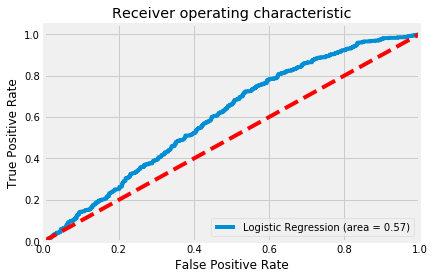

In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_reg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()